In [118]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [119]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [120]:
Data_set = np.loadtxt("data/ThoraricSurgery3.csv", delimiter=",")
X = Data_set[:,0:16]
y = Data_set[:,16]

In [121]:
Data_set.shape

(470, 17)

In [122]:
model = Sequential()

In [123]:
model.add(Dense(30 ,  input_dim = 16 , activation = 'relu' ))
model.add(Dense(1  ,  activation = 'sigmoid' ))

In [124]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [125]:
model.fit(X,y,epochs = 5, batch_size = 16)

Epoch 1/5
30/30 [==============================] - 0s 1ms/step - loss: 18.9583 - accuracy: 0.1489
Epoch 2/5
30/30 [==============================] - 0s 1ms/step - loss: 6.0344 - accuracy: 0.1830 
Epoch 3/5
30/30 [==============================] - 0s 1ms/step - loss: 0.5953 - accuracy: 0.8489
Epoch 4/5
30/30 [==============================] - 0s 1ms/step - loss: 0.5599 - accuracy: 0.8511
Epoch 5/5
30/30 [==============================] - 0s 1ms/step - loss: 0.5247 - accuracy: 0.8468


In [ ]:
# model.predict()

In [ ]:
# 예측모델

In [126]:
x = np.array([2,4,6,8])
y = np.array([81,93,91,97])

In [127]:
mx = np.mean(x)
my = np.mean(y)
print("x의 평균값:", mx)
print("y의 평균값:", my)

x의 평균값: 5.0
y의 평균값: 90.5


In [128]:
divisor = sum([(i - mx)**2 for i in x])
def top(x, mx, y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my)
    return d
dividend = top(x, mx, y, my)
print("분모:", divisor)
print("분자:", dividend)

분모: 20.0
분자: 46.0


In [129]:
a = dividend / divisor # y절편
b = my - (mx*a) # 기울기

In [130]:
print('기울기a = ',a)
print('y절편b = ',b)

기울기a =  2.3
y절편b =  79.0


In [131]:
def predict(x):
    return a*x+b  # 회귀모델 = 2.3 * X + 79

In [132]:
predict_result = []
for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print("공부시간=%.f, 실제점수=%.f, 예측점수=%.f" % (x[i], y[i], predict(x[i])))

공부시간=2, 실제점수=81, 예측점수=84
공부시간=4, 실제점수=93, 예측점수=88
공부시간=6, 실제점수=91, 예측점수=93
공부시간=8, 실제점수=97, 예측점수=97


In [133]:
import matplotlib.pyplot as plt

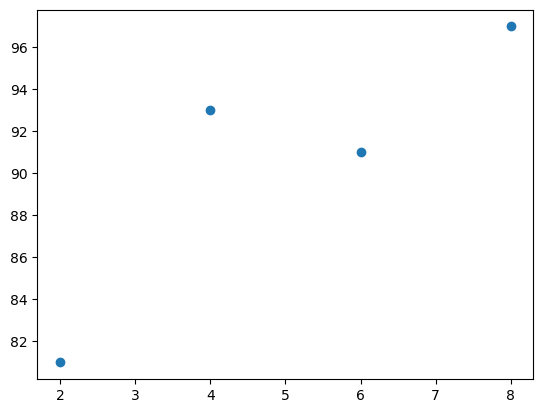

In [134]:
plt.scatter(x,y)
plt.show()

In [135]:
# 기울기 a와 절편 b의 값을 초기화
a = 0
b = 0

In [136]:
# 학습률
lr = 0.03

In [137]:
# 반복 횠수
epochs = 2001

In [138]:
# x 값이 개수
n=len(x)

#경사 하강법
for i in range(epochs):                  # epoch 수 만큼 반복
    
    y_pred = a * x + b                   # 예측 값 
    error = y - y_pred                   # 실제 값과 비교한 오차를 error
    
    a_diff = (2/n) * sum(-x * (error))   # 오차 함수를 a로 편미분한 값 
    b_diff = (2/n) * sum(-(error))       # 오차 함수를 b로 편미분한 값 
    
    a = a - lr * a_diff     # 학습률을 곱해 기존의 a 값을 업데이트
    b = b - lr * b_diff     # 학습률을 곱해 기존의 b 값을 업데이트
    
    if i % 100 == 0:        # 100번 반복될 때마다 현재의 a 값, b 값을 출력
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))

epoch=0, 기울기=27.8400, 절편=5.4300
epoch=100, 기울기=7.0739, 절편=50.5117
epoch=200, 기울기=4.0960, 절편=68.2822
epoch=300, 기울기=2.9757, 절편=74.9678
epoch=400, 기울기=2.5542, 절편=77.4830
epoch=500, 기울기=2.3956, 절편=78.4293
epoch=600, 기울기=2.3360, 절편=78.7853
epoch=700, 기울기=2.3135, 절편=78.9192
epoch=800, 기울기=2.3051, 절편=78.9696
epoch=900, 기울기=2.3019, 절편=78.9886
epoch=1000, 기울기=2.3007, 절편=78.9957
epoch=1100, 기울기=2.3003, 절편=78.9984
epoch=1200, 기울기=2.3001, 절편=78.9994
epoch=1300, 기울기=2.3000, 절편=78.9998
epoch=1400, 기울기=2.3000, 절편=78.9999
epoch=1500, 기울기=2.3000, 절편=79.0000
epoch=1600, 기울기=2.3000, 절편=79.0000
epoch=1700, 기울기=2.3000, 절편=79.0000
epoch=1800, 기울기=2.3000, 절편=79.0000
epoch=1900, 기울기=2.3000, 절편=79.0000
epoch=2000, 기울기=2.3000, 절편=79.0000


In [139]:
hx = a * x + b
hx # 모델의 예측값

array([83.59999984, 88.19999992, 92.8       , 97.40000008])

In [140]:
y # 실제 값

array([81, 93, 91, 97])

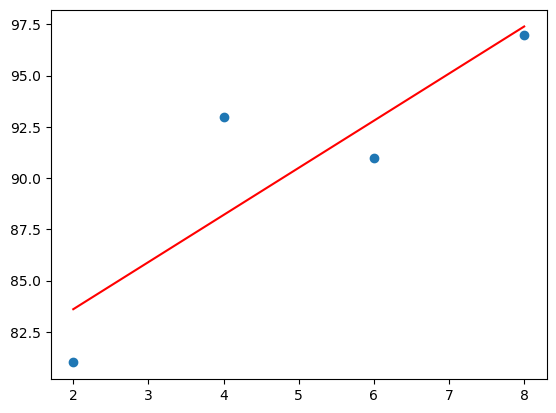

In [141]:
plt.scatter(x,y)
plt.plot(x,hx,'r')
plt.show()

# 로지스틱 회귀모델

In [142]:
x = np.array([2, 4, 6, 8, 10, 12, 14])
y = np.array([0, 0, 0, 1, 1, 1, 1])

In [143]:
model = Sequential()

In [144]:
model.add(Dense(1, input_dim = 1, activation = 'sigmoid'))

In [145]:
model.compile(optimizer = 'sgd', loss = 'binary_crossentropy')

In [146]:
model.fit(x,y,epochs =5000)

Epoch 1/5000
1/1 [==============================] - 0s 221ms/step - loss: 2.9520
Epoch 2/5000
1/1 [==============================] - 0s 4ms/step - loss: 2.9211
Epoch 3/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.8903
Epoch 4/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.8595
Epoch 5/5000
1/1 [==============================] - 0s 4ms/step - loss: 2.8287
Epoch 6/5000
1/1 [==============================] - 0s 5ms/step - loss: 2.7979
Epoch 7/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.7671
Epoch 8/5000
1/1 [==============================] - 0s 4ms/step - loss: 2.7363
Epoch 9/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.7056
Epoch 10/5000
1/1 [==============================] - 0s 4ms/step - loss: 2.6749
Epoch 11/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.6442
Epoch 12/5000
1/1 [==============================] - 0s 4ms/step - loss: 2.6135
Epoch 13/5000
1/1 [============================

1/1 [==============================] - 0s 2ms/step - loss: 0.5020
Epoch 104/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5000
Epoch 105/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4983
Epoch 106/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4969
Epoch 107/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4956
Epoch 108/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4946
Epoch 109/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4937
Epoch 110/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4929
Epoch 111/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4922
Epoch 112/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4916
Epoch 113/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4911
Epoch 114/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4907
Epoch 115/5000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 0.4713
Epoch 205/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4711
Epoch 206/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4709
Epoch 207/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4707
Epoch 208/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4705
Epoch 209/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4703
Epoch 210/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4701
Epoch 211/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4699
Epoch 212/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4697
Epoch 213/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4695
Epoch 214/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4693
Epoch 215/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4691
Epoch 216/5000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.4522
Epoch 306/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4520
Epoch 307/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4518
Epoch 308/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4517
Epoch 309/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4515
Epoch 310/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4513
Epoch 311/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4511
Epoch 312/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4509
Epoch 313/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4508
Epoch 314/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4506
Epoch 315/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4504
Epoch 316/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4502
Epoch 317/5000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 0.4347
Epoch 407/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4345
Epoch 408/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4343
Epoch 409/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4342
Epoch 410/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4340
Epoch 411/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4338
Epoch 412/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4337
Epoch 413/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4335
Epoch 414/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4333
Epoch 415/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4332
Epoch 416/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4330
Epoch 417/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4328
Epoch 418/5000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.4185
Epoch 508/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4184
Epoch 509/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4182
Epoch 510/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4180
Epoch 511/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4179
Epoch 512/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4177
Epoch 513/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4176
Epoch 514/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4174
Epoch 515/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4173
Epoch 516/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4171
Epoch 517/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4170
Epoch 518/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4168
Epoch 519/5000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.4036
Epoch 609/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4035
Epoch 610/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4033
Epoch 611/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4032
Epoch 612/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4030
Epoch 613/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4029
Epoch 614/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4028
Epoch 615/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4026
Epoch 616/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4025
Epoch 617/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4023
Epoch 618/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4022
Epoch 619/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4021
Epoch 620/5000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.3898
Epoch 710/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3897
Epoch 711/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3896
Epoch 712/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3894
Epoch 713/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3893
Epoch 714/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3892
Epoch 715/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3891
Epoch 716/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3889
Epoch 717/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3888
Epoch 718/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3887
Epoch 719/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3885
Epoch 720/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3884
Epoch 721/5000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 0.3771
Epoch 811/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3770
Epoch 812/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3769
Epoch 813/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3767
Epoch 814/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3766
Epoch 815/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3765
Epoch 816/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3764
Epoch 817/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3763
Epoch 818/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3761
Epoch 819/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3760
Epoch 820/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3759
Epoch 821/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3758
Epoch 822/5000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 0.3653
Epoch 912/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3652
Epoch 913/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3651
Epoch 914/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3650
Epoch 915/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3649
Epoch 916/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3647
Epoch 917/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3646
Epoch 918/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3645
Epoch 919/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3644
Epoch 920/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3643
Epoch 921/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3642
Epoch 922/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3641
Epoch 923/5000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.3544
Epoch 1013/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3542
Epoch 1014/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3541
Epoch 1015/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3540
Epoch 1016/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3539
Epoch 1017/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3538
Epoch 1018/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3537
Epoch 1019/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3536
Epoch 1020/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3535
Epoch 1021/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3534
Epoch 1022/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3533
Epoch 1023/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3532
Epoch 1024/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.3443
Epoch 1113/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3442
Epoch 1114/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3441
Epoch 1115/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3440
Epoch 1116/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3439
Epoch 1117/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3438
Epoch 1118/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3437
Epoch 1119/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3436
Epoch 1120/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3435
Epoch 1121/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3434
Epoch 1122/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3433
Epoch 1123/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3432
Epoch 1124/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.3348
Epoch 1213/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3347
Epoch 1214/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3347
Epoch 1215/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3346
Epoch 1216/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3345
Epoch 1217/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3344
Epoch 1218/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3343
Epoch 1219/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3342
Epoch 1220/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3341
Epoch 1221/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3340
Epoch 1222/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3339
Epoch 1223/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3338
Epoch 1224/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.3260
Epoch 1313/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3260
Epoch 1314/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3259
Epoch 1315/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3258
Epoch 1316/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3257
Epoch 1317/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3256
Epoch 1318/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3255
Epoch 1319/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3254
Epoch 1320/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3254
Epoch 1321/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3253
Epoch 1322/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3252
Epoch 1323/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3251
Epoch 1324/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.3178
Epoch 1413/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3177
Epoch 1414/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3176
Epoch 1415/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3176
Epoch 1416/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3175
Epoch 1417/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3174
Epoch 1418/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3173
Epoch 1419/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3172
Epoch 1420/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3172
Epoch 1421/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3171
Epoch 1422/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3170
Epoch 1423/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3169
Epoch 1424/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.3101
Epoch 1513/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3100
Epoch 1514/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3099
Epoch 1515/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3099
Epoch 1516/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3098
Epoch 1517/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3097
Epoch 1518/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3096
Epoch 1519/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3096
Epoch 1520/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3095
Epoch 1521/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3094
Epoch 1522/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3093
Epoch 1523/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3093
Epoch 1524/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.3028
Epoch 1613/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3028
Epoch 1614/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3027
Epoch 1615/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3026
Epoch 1616/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3025
Epoch 1617/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3025
Epoch 1618/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3024
Epoch 1619/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3023
Epoch 1620/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3023
Epoch 1621/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3022
Epoch 1622/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3021
Epoch 1623/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3021
Epoch 1624/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2960
Epoch 1713/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2959
Epoch 1714/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2959
Epoch 1715/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2958
Epoch 1716/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2957
Epoch 1717/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2957
Epoch 1718/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2956
Epoch 1719/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2955
Epoch 1720/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2955
Epoch 1721/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2954
Epoch 1722/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2953
Epoch 1723/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2953
Epoch 1724/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.2896
Epoch 1813/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2895
Epoch 1814/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2894
Epoch 1815/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2894
Epoch 1816/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2893
Epoch 1817/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2893
Epoch 1818/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2892
Epoch 1819/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2891
Epoch 1820/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2891
Epoch 1821/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2890
Epoch 1822/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2890
Epoch 1823/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2889
Epoch 1824/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2835
Epoch 1913/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2834
Epoch 1914/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2834
Epoch 1915/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2833
Epoch 1916/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2833
Epoch 1917/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2832
Epoch 1918/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2832
Epoch 1919/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2831
Epoch 1920/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2830
Epoch 1921/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2830
Epoch 1922/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2829
Epoch 1923/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2829
Epoch 1924/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2778
Epoch 2013/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2777
Epoch 2014/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2777
Epoch 2015/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2776
Epoch 2016/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2775
Epoch 2017/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2775
Epoch 2018/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2774
Epoch 2019/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2774
Epoch 2020/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2773
Epoch 2021/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2773
Epoch 2022/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2772
Epoch 2023/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2772
Epoch 2024/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.2723
Epoch 2113/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2723
Epoch 2114/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2722
Epoch 2115/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2722
Epoch 2116/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2721
Epoch 2117/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2721
Epoch 2118/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2720
Epoch 2119/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2720
Epoch 2120/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2719
Epoch 2121/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2719
Epoch 2122/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2718
Epoch 2123/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2718
Epoch 2124/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.2672
Epoch 2213/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2671
Epoch 2214/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2671
Epoch 2215/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2670
Epoch 2216/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2670
Epoch 2217/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2669
Epoch 2218/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2669
Epoch 2219/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2668
Epoch 2220/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2668
Epoch 2221/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2667
Epoch 2222/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2667
Epoch 2223/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2666
Epoch 2224/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.2623
Epoch 2313/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2622
Epoch 2314/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2622
Epoch 2315/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2621
Epoch 2316/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2621
Epoch 2317/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2621
Epoch 2318/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2620
Epoch 2319/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2620
Epoch 2320/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2619
Epoch 2321/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2619
Epoch 2322/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2618
Epoch 2323/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2618
Epoch 2324/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.2576
Epoch 2413/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2576
Epoch 2414/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2575
Epoch 2415/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2575
Epoch 2416/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2575
Epoch 2417/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2574
Epoch 2418/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2574
Epoch 2419/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2573
Epoch 2420/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2573
Epoch 2421/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2572
Epoch 2422/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2572
Epoch 2423/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2571
Epoch 2424/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2532
Epoch 2513/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2532
Epoch 2514/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2531
Epoch 2515/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2531
Epoch 2516/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2530
Epoch 2517/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2530
Epoch 2518/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2530
Epoch 2519/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2529
Epoch 2520/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2529
Epoch 2521/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2528
Epoch 2522/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2528
Epoch 2523/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2527
Epoch 2524/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.2490
Epoch 2613/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2490
Epoch 2614/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2489
Epoch 2615/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2489
Epoch 2616/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2488
Epoch 2617/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2488
Epoch 2618/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2487
Epoch 2619/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2487
Epoch 2620/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2487
Epoch 2621/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2486
Epoch 2622/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2486
Epoch 2623/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2485
Epoch 2624/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.2450
Epoch 2713/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2449
Epoch 2714/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2449
Epoch 2715/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2449
Epoch 2716/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2448
Epoch 2717/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2448
Epoch 2718/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2447
Epoch 2719/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2447
Epoch 2720/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2447
Epoch 2721/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2446
Epoch 2722/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2446
Epoch 2723/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2445
Epoch 2724/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2411
Epoch 2813/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2411
Epoch 2814/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2410
Epoch 2815/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2410
Epoch 2816/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2410
Epoch 2817/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2409
Epoch 2818/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2409
Epoch 2819/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2409
Epoch 2820/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2408
Epoch 2821/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2408
Epoch 2822/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2407
Epoch 2823/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2407
Epoch 2824/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.2374
Epoch 2913/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2374
Epoch 2914/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2374
Epoch 2915/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2373
Epoch 2916/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2373
Epoch 2917/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2373
Epoch 2918/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2372
Epoch 2919/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2372
Epoch 2920/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2372
Epoch 2921/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2371
Epoch 2922/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2371
Epoch 2923/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2371
Epoch 2924/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2339
Epoch 3013/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2339
Epoch 3014/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2339
Epoch 3015/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2338
Epoch 3016/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2338
Epoch 3017/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2338
Epoch 3018/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2337
Epoch 3019/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2337
Epoch 3020/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2336
Epoch 3021/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2336
Epoch 3022/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2336
Epoch 3023/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2335
Epoch 3024/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2306
Epoch 3113/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2305
Epoch 3114/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2305
Epoch 3115/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2305
Epoch 3116/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2304
Epoch 3117/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2304
Epoch 3118/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2304
Epoch 3119/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2303
Epoch 3120/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2303
Epoch 3121/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2303
Epoch 3122/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2302
Epoch 3123/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2302
Epoch 3124/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2273
Epoch 3213/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2273
Epoch 3214/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2272
Epoch 3215/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2272
Epoch 3216/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2272
Epoch 3217/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2272
Epoch 3218/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2271
Epoch 3219/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2271
Epoch 3220/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2271
Epoch 3221/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2270
Epoch 3222/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2270
Epoch 3223/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2270
Epoch 3224/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.2242
Epoch 3313/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2242
Epoch 3314/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2241
Epoch 3315/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2241
Epoch 3316/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2241
Epoch 3317/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2241
Epoch 3318/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2240
Epoch 3319/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2240
Epoch 3320/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2240
Epoch 3321/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2239
Epoch 3322/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2239
Epoch 3323/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2239
Epoch 3324/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.2212
Epoch 3413/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2212
Epoch 3414/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2212
Epoch 3415/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2211
Epoch 3416/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2211
Epoch 3417/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2211
Epoch 3418/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2210
Epoch 3419/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2210
Epoch 3420/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2210
Epoch 3421/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2210
Epoch 3422/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2209
Epoch 3423/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2209
Epoch 3424/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2183
Epoch 3513/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2183
Epoch 3514/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2183
Epoch 3515/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2183
Epoch 3516/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2182
Epoch 3517/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2182
Epoch 3518/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2182
Epoch 3519/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2181
Epoch 3520/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2181
Epoch 3521/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2181
Epoch 3522/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2181
Epoch 3523/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2180
Epoch 3524/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.2156
Epoch 3613/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2155
Epoch 3614/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2155
Epoch 3615/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2155
Epoch 3616/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2155
Epoch 3617/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2154
Epoch 3618/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2154
Epoch 3619/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2154
Epoch 3620/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2154
Epoch 3621/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2153
Epoch 3622/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2153
Epoch 3623/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2153
Epoch 3624/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2129
Epoch 3713/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2129
Epoch 3714/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2129
Epoch 3715/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2128
Epoch 3716/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2128
Epoch 3717/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2128
Epoch 3718/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2128
Epoch 3719/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2127
Epoch 3720/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2127
Epoch 3721/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2127
Epoch 3722/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2126
Epoch 3723/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2126
Epoch 3724/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2103
Epoch 3813/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2103
Epoch 3814/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2103
Epoch 3815/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2103
Epoch 3816/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2102
Epoch 3817/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2102
Epoch 3818/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2102
Epoch 3819/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2102
Epoch 3820/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2101
Epoch 3821/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2101
Epoch 3822/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2101
Epoch 3823/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2101
Epoch 3824/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.2079
Epoch 3913/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2078
Epoch 3914/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2078
Epoch 3915/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2078
Epoch 3916/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2078
Epoch 3917/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2077
Epoch 3918/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2077
Epoch 3919/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2077
Epoch 3920/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2077
Epoch 3921/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2076
Epoch 3922/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2076
Epoch 3923/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2076
Epoch 3924/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.2055
Epoch 4013/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2054
Epoch 4014/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2054
Epoch 4015/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2054
Epoch 4016/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2054
Epoch 4017/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2053
Epoch 4018/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2053
Epoch 4019/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2053
Epoch 4020/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2053
Epoch 4021/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2052
Epoch 4022/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2052
Epoch 4023/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2052
Epoch 4024/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.2031
Epoch 4113/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2031
Epoch 4114/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2031
Epoch 4115/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2031
Epoch 4116/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2031
Epoch 4117/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2030
Epoch 4118/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2030
Epoch 4119/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2030
Epoch 4120/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2030
Epoch 4121/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2029
Epoch 4122/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2029
Epoch 4123/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2029
Epoch 4124/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2009
Epoch 4213/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2009
Epoch 4214/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2009
Epoch 4215/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2008
Epoch 4216/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2008
Epoch 4217/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2008
Epoch 4218/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2008
Epoch 4219/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2008
Epoch 4220/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2007
Epoch 4221/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2007
Epoch 4222/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2007
Epoch 4223/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2007
Epoch 4224/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.1987
Epoch 4313/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1987
Epoch 4314/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1987
Epoch 4315/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1987
Epoch 4316/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1987
Epoch 4317/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1986
Epoch 4318/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1986
Epoch 4319/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1986
Epoch 4320/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1986
Epoch 4321/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1985
Epoch 4322/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1985
Epoch 4323/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1985
Epoch 4324/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.1966
Epoch 4413/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1966
Epoch 4414/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1966
Epoch 4415/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1966
Epoch 4416/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1966
Epoch 4417/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1965
Epoch 4418/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1965
Epoch 4419/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1965
Epoch 4420/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1965
Epoch 4421/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1965
Epoch 4422/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1964
Epoch 4423/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1964
Epoch 4424/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.1946
Epoch 4513/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1946
Epoch 4514/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1946
Epoch 4515/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1945
Epoch 4516/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1945
Epoch 4517/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1945
Epoch 4518/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1945
Epoch 4519/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1945
Epoch 4520/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1944
Epoch 4521/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1944
Epoch 4522/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1944
Epoch 4523/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1944
Epoch 4524/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.1926
Epoch 4613/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1926
Epoch 4614/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1926
Epoch 4615/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1926
Epoch 4616/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1926
Epoch 4617/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1925
Epoch 4618/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1925
Epoch 4619/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1925
Epoch 4620/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1925
Epoch 4621/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1925
Epoch 4622/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1924
Epoch 4623/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1924
Epoch 4624/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.1907
Epoch 4713/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1907
Epoch 4714/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1907
Epoch 4715/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1907
Epoch 4716/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1906
Epoch 4717/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1906
Epoch 4718/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1906
Epoch 4719/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1906
Epoch 4720/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1906
Epoch 4721/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1905
Epoch 4722/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1905
Epoch 4723/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1905
Epoch 4724/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.1889
Epoch 4813/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1888
Epoch 4814/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1888
Epoch 4815/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1888
Epoch 4816/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1888
Epoch 4817/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1888
Epoch 4818/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1888
Epoch 4819/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1887
Epoch 4820/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1887
Epoch 4821/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1887
Epoch 4822/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1887
Epoch 4823/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1887
Epoch 4824/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.1871
Epoch 4913/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1870
Epoch 4914/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1870
Epoch 4915/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1870
Epoch 4916/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1870
Epoch 4917/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1870
Epoch 4918/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1870
Epoch 4919/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1869
Epoch 4920/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1869
Epoch 4921/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1869
Epoch 4922/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1869
Epoch 4923/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1869
Epoch 4924/5000
1/1 [===========

1/1 [==============================] - 0s 35ms/step


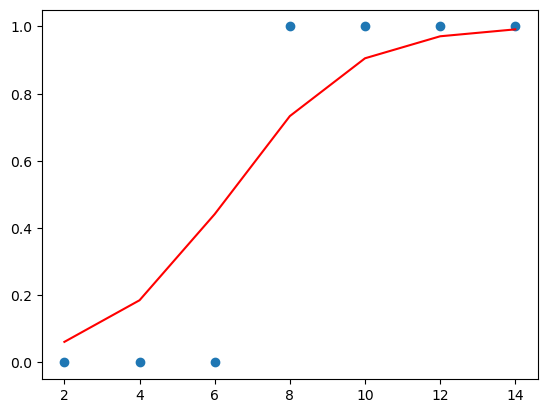

In [147]:
plt.scatter(x,y)
plt.plot(x,model.predict(x),'r')
plt.show()
# 0.5 > y 는 불합격
# 0.5 =< y 는 불합격

In [148]:
model.predict([7])[0][0]*100 
# 59.7%
if model.predict([7])[0][0]*100 > 50:
    print('합격으로 예상')
else:
    print('불합격으로 예상')

1/1 [==============================] - 0s 29ms/step
합격으로 예상


# 다층 퍼셉트론

In [149]:
# 가중치와 바이어스
w11 = np.array([-2, -2])
w12 = np.array([2, 2])
w2 = np.array([1, 1])
b1 = 3
b2 = -1
b3 = -1

# 퍼셉트론
def MLP(x, w, b):
    y = np.sum(w * x) + b
    if y <= 0:
        return 0
    else:
        return 1

In [150]:
def OR(x1,x2):
    return MLP(np.array([x1,x2]),w12,b2)
def AND(x1,x2):
    return MLP(np.array([x1,x2]),w2,b3)
def NAND(x1,x2):
    return MLP(np.array([x1,x2]),w11,b1)
def XOR(x1,x2):
    return AND(NAND(x1,x2),OR(x1,x2))

In [151]:
for x in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = OR(x[0],x[1]) # 0 1 1 1 
    y = AND(x[0],x[1]) # 0 0 0 1
    y = XOR(x[0],x[1]) # 0 1 1 0
    print(y)

0
1
1
0


In [152]:
import seaborn as sns

In [153]:
df = pd.read_csv('data/pima-indians-diabetes3.csv')
df.head()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [154]:
df['diabetes'].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

In [155]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [156]:
df.corr()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


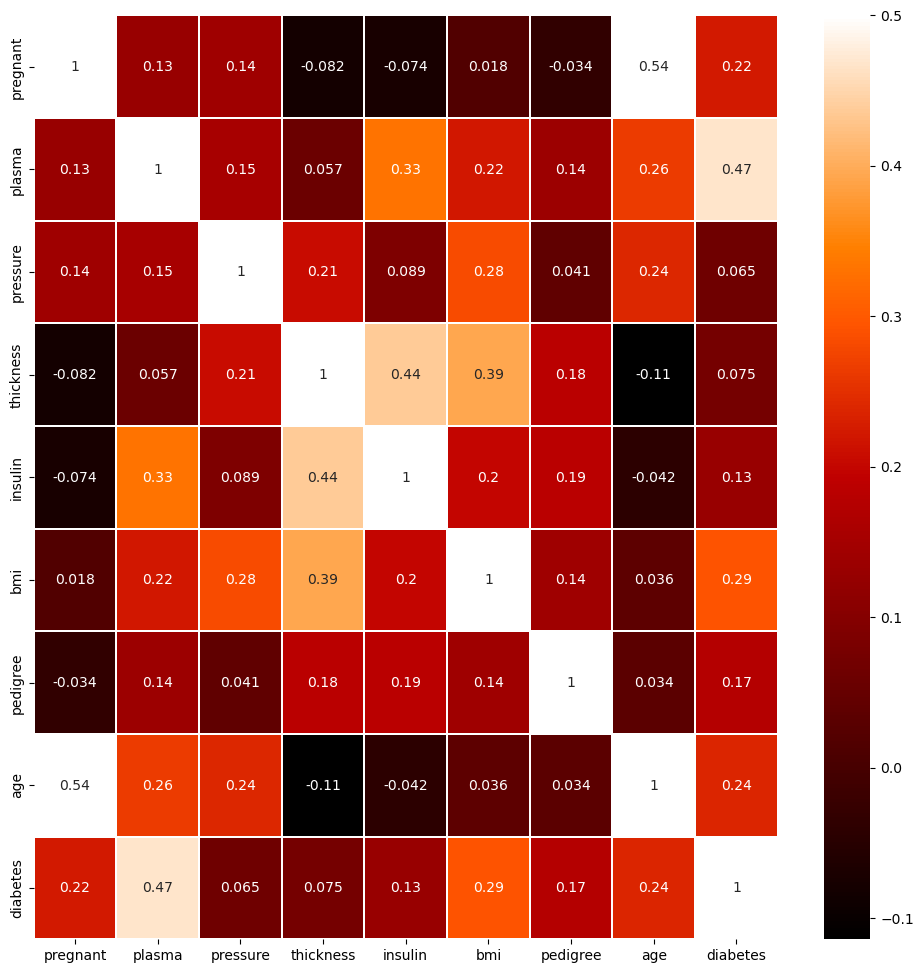

In [157]:
colormap = plt.cm.gist_heat   
plt.figure(figsize=(12,12))  
sns.heatmap(df.corr(),linewidths=0.1,vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()

In [158]:
df.plasma

0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: plasma, Length: 768, dtype: int64

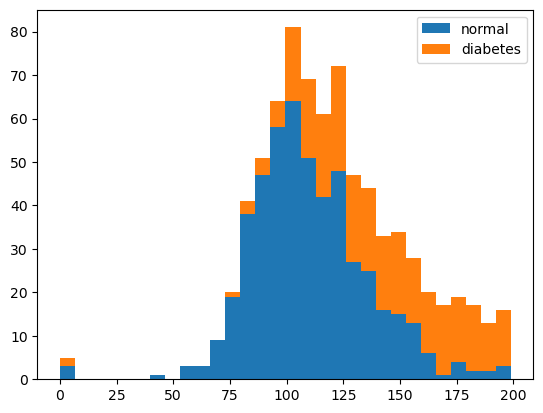

In [159]:
plt.hist(x=[df.plasma[df.diabetes==0], df.plasma[df.diabetes==1]],
         bins=30, histtype='barstacked', label=['normal','diabetes'])
plt.legend()
plt.show()

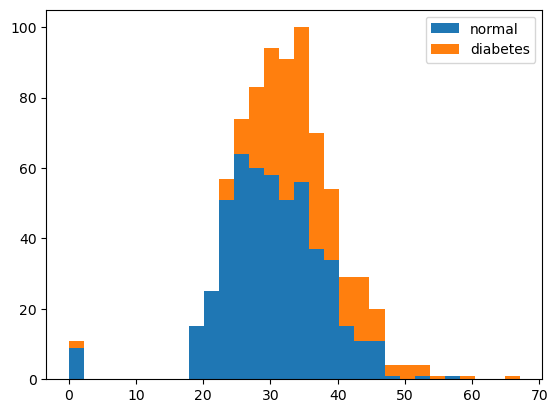

In [160]:
plt.hist(x=[df.bmi[df.diabetes==0], df.bmi[df.diabetes==1]], bins=30,
         histtype='barstacked', label=['normal','diabetes'])
plt.legend()

In [161]:
X = df.iloc[:,0:8]
y = df.iloc[:,8]

In [162]:
model = Sequential()

In [163]:
model.add(Dense(32, input_dim=16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [164]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 32)                544       
                                                                 
 dense_18 (Dense)            (None, 16)                528       
                                                                 
 dense_19 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1089 (4.25 KB)
Trainable params: 1089 (4.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [165]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [166]:
model.fit(X,y,epochs=200,batch_size = 10)

Epoch 1/200


ValueError: in user code:

    File "C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1126, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\user\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_10" is incompatible with the layer: expected shape=(None, 16), found shape=(None, 8)


In [170]:
df = pd.read_csv('data/sonar3.csv',header = None)
df.head()
# 암석 (0) / 광석(1)
# 60개의 음파 관련 속성, 광석 여부

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0


In [171]:
df[60].value_counts()

1    111
0     97
Name: 60, dtype: int64

In [172]:
X = df.iloc[:,0:60]
y = df.iloc[:,60]

In [173]:
model = Sequential()

model.add(Dense(24, input_dim = 60 , activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(X,y,epochs=200, batch_size =10)

Epoch 1/200
21/21 [==============================] - 1s 1ms/step - loss: 0.6985 - accuracy: 0.4808
Epoch 2/200
21/21 [==============================] - 0s 1ms/step - loss: 0.6780 - accuracy: 0.5385
Epoch 3/200
21/21 [==============================] - 0s 1ms/step - loss: 0.6667 - accuracy: 0.6010
Epoch 4/200
21/21 [==============================] - 0s 1ms/step - loss: 0.6554 - accuracy: 0.6250
Epoch 5/200
21/21 [==============================] - 0s 1ms/step - loss: 0.6427 - accuracy: 0.6827
Epoch 6/200
21/21 [==============================] - 0s 1ms/step - loss: 0.6267 - accuracy: 0.7115
Epoch 7/200
21/21 [==============================] - 0s 1ms/step - loss: 0.6115 - accuracy: 0.6971
Epoch 8/200
21/21 [==============================] - 0s 1ms/step - loss: 0.5968 - accuracy: 0.7019
Epoch 9/200
21/21 [==============================] - 0s 1ms/step - loss: 0.5826 - accuracy: 0.7404
Epoch 10/200
21/21 [==============================] - 0s 1ms/step - loss: 0.5592 - accuracy: 0.7212
Epoch 11/

21/21 [==============================] - 0s 1ms/step - loss: 0.2173 - accuracy: 0.9279
Epoch 84/200
21/21 [==============================] - 0s 1ms/step - loss: 0.2100 - accuracy: 0.9327
Epoch 85/200
21/21 [==============================] - 0s 1ms/step - loss: 0.2036 - accuracy: 0.9375
Epoch 86/200
21/21 [==============================] - 0s 1ms/step - loss: 0.2015 - accuracy: 0.9327
Epoch 87/200
21/21 [==============================] - 0s 1ms/step - loss: 0.2119 - accuracy: 0.9327
Epoch 88/200
21/21 [==============================] - 0s 1ms/step - loss: 0.1953 - accuracy: 0.9423
Epoch 89/200
21/21 [==============================] - 0s 1ms/step - loss: 0.2021 - accuracy: 0.9279
Epoch 90/200
21/21 [==============================] - 0s 1ms/step - loss: 0.1968 - accuracy: 0.9375
Epoch 91/200
21/21 [==============================] - 0s 1ms/step - loss: 0.1912 - accuracy: 0.9423
Epoch 92/200
21/21 [==============================] - 0s 1ms/step - loss: 0.1900 - accuracy: 0.9327
Epoch 93/200


21/21 [==============================] - 0s 1ms/step - loss: 0.0708 - accuracy: 0.9904
Epoch 165/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0678 - accuracy: 0.9952
Epoch 166/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0663 - accuracy: 0.9904
Epoch 167/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0669 - accuracy: 0.9904
Epoch 168/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0661 - accuracy: 0.9904
Epoch 169/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0635 - accuracy: 0.9904
Epoch 170/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0660 - accuracy: 0.9904
Epoch 171/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0637 - accuracy: 0.9952
Epoch 172/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0664 - accuracy: 0.9856
Epoch 173/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0672 - accuracy: 0.9904
Epoc

In [208]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
# 7:3의 비율로 섞여서 나와라

In [177]:
X_train.shape

(145, 60)

In [179]:
y_train.value_counts()

1    77
0    68
Name: 60, dtype: int64

In [203]:
model = Sequential()
model.add(Dense(24,  input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [204]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model.fit(X_train, y_train, epochs=200, batch_size=10)

Epoch 1/200
15/15 [==============================] - 1s 1ms/step - loss: 0.7023 - accuracy: 0.4621
Epoch 2/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6774 - accuracy: 0.5517
Epoch 3/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6619 - accuracy: 0.6000
Epoch 4/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6535 - accuracy: 0.6207
Epoch 5/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6395 - accuracy: 0.6828
Epoch 6/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6297 - accuracy: 0.7310
Epoch 7/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6207 - accuracy: 0.6966
Epoch 8/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6040 - accuracy: 0.7379
Epoch 9/200
15/15 [==============================] - 0s 1ms/step - loss: 0.5938 - accuracy: 0.7517
Epoch 10/200
15/15 [==============================] - 0s 1ms/step - loss: 0.5816 - accuracy: 0.7379
Epoch 11/

15/15 [==============================] - 0s 1ms/step - loss: 0.1325 - accuracy: 0.9655
Epoch 84/200
15/15 [==============================] - 0s 1ms/step - loss: 0.1395 - accuracy: 0.9655
Epoch 85/200
15/15 [==============================] - 0s 1ms/step - loss: 0.1188 - accuracy: 0.9793
Epoch 86/200
15/15 [==============================] - 0s 1ms/step - loss: 0.1205 - accuracy: 0.9793
Epoch 87/200
15/15 [==============================] - 0s 1ms/step - loss: 0.1190 - accuracy: 0.9724
Epoch 88/200
15/15 [==============================] - 0s 1ms/step - loss: 0.1091 - accuracy: 0.9931
Epoch 89/200
15/15 [==============================] - 0s 1ms/step - loss: 0.1125 - accuracy: 0.9793
Epoch 90/200
15/15 [==============================] - 0s 1ms/step - loss: 0.1070 - accuracy: 1.0000
Epoch 91/200
15/15 [==============================] - 0s 1ms/step - loss: 0.1041 - accuracy: 0.9931
Epoch 92/200
15/15 [==============================] - 0s 1ms/step - loss: 0.1082 - accuracy: 0.9793
Epoch 93/200


15/15 [==============================] - 0s 1ms/step - loss: 0.0221 - accuracy: 1.0000
Epoch 165/200
15/15 [==============================] - 0s 1ms/step - loss: 0.0208 - accuracy: 1.0000
Epoch 166/200
15/15 [==============================] - 0s 1ms/step - loss: 0.0217 - accuracy: 1.0000
Epoch 167/200
15/15 [==============================] - 0s 1ms/step - loss: 0.0200 - accuracy: 1.0000
Epoch 168/200
15/15 [==============================] - 0s 1ms/step - loss: 0.0182 - accuracy: 1.0000
Epoch 169/200
15/15 [==============================] - 0s 1ms/step - loss: 0.0173 - accuracy: 1.0000
Epoch 170/200
15/15 [==============================] - 0s 1ms/step - loss: 0.0173 - accuracy: 1.0000
Epoch 171/200
15/15 [==============================] - 0s 1ms/step - loss: 0.0194 - accuracy: 1.0000
Epoch 172/200
15/15 [==============================] - 0s 1ms/step - loss: 0.0186 - accuracy: 1.0000
Epoch 173/200
15/15 [==============================] - 0s 1ms/step - loss: 0.0168 - accuracy: 1.0000
Epoc

In [205]:
score = model.evaluate(X_test,y_test)
score[1] # 정확도

2/2 [==============================] - 0s 3ms/step - loss: 0.8212 - accuracy: 0.8095


0.8095238208770752

In [206]:
model.save('myModel.hdf5') 

In [209]:
myModel = load_model('myModel.hdf5') # 모델 불러오기 # pretrainde model

In [212]:
del model

In [210]:
myModel.evaluate(X_test,y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.8212 - accuracy: 0.8095


[0.8211780786514282, 0.8095238208770752]

In [211]:
# myModel.predict([xdata])

* myModel : 광산/암산 구분 모델 (사전 학습된 모델)
* 해저 천원자원(가스) 탐사 프로젝트
* 데이터 구성되있음
>myModel -> 불러오기 -> 해저 천연 자원 데이터 추가학습 -> 해저 천연자원 분류모델 : 전이학습(파인튜닝)

In [213]:
df = pd.read_csv('data/wine.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [214]:
X = df.iloc[:,0:12]
y = df.iloc[:,12]

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [216]:
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 30)                390       
                                                                 
 dense_33 (Dense)            (None, 12)                372       
                                                                 
 dense_34 (Dense)            (None, 8)                 104       
                                                                 
 dense_35 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [217]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25) 
# 전체 데이터 6497건 
# 8(train) : 2(test)
# 나누어진 train 데이터를 validation과 나눔
# (0.75)train / (0.25)validation
# validation : 0.8 x 0.25 = 0.2  -- 전체 데이터의 0.2

Epoch 1/50
8/8 [==============================] - 1s 21ms/step - loss: 0.6504 - accuracy: 0.7483 - val_loss: 0.4599 - val_accuracy: 0.7585
Epoch 2/50
8/8 [==============================] - 0s 5ms/step - loss: 0.4385 - accuracy: 0.7483 - val_loss: 0.3961 - val_accuracy: 0.7585
Epoch 3/50
8/8 [==============================] - 0s 5ms/step - loss: 0.3997 - accuracy: 0.7483 - val_loss: 0.3762 - val_accuracy: 0.7585
Epoch 4/50
8/8 [==============================] - 0s 5ms/step - loss: 0.3713 - accuracy: 0.7485 - val_loss: 0.3504 - val_accuracy: 0.7600
Epoch 5/50
8/8 [==============================] - 0s 5ms/step - loss: 0.3477 - accuracy: 0.7590 - val_loss: 0.3292 - val_accuracy: 0.7931
Epoch 6/50
8/8 [==============================] - 0s 5ms/step - loss: 0.3307 - accuracy: 0.8224 - val_loss: 0.3166 - val_accuracy: 0.8615
Epoch 7/50
8/8 [==============================] - 0s 4ms/step - loss: 0.3175 - accuracy: 0.8832 - val_loss: 0.3031 - val_accuracy: 0.8908
Epoch 8/50
8/8 [=================

In [218]:
model.evaluate(X_test,y_test)

41/41 [==============================] - 0s 998us/step - loss: 0.1224 - accuracy: 0.9508


[0.1224411278963089, 0.9507692456245422]

In [ ]:
# 모델의 최적 상태 저장

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 30)                390       
                                                                 
 dense_37 (Dense)            (None, 12)                372       
                                                                 
 dense_38 (Dense)            (None, 8)                 104       
                                                                 
 dense_39 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [220]:
modelpath="./data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"

In [221]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [223]:
checkpointer = ModelCheckpoint(filepath = modelpath,verbose = 1)
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer])


Epoch 1: saving model to ./data/model/all\01-0.7777.hdf5

Epoch 2: saving model to ./data/model/all\02-0.8038.hdf5

Epoch 3: saving model to ./data/model/all\03-0.8500.hdf5

Epoch 4: saving model to ./data/model/all\04-0.9031.hdf5

Epoch 5: saving model to ./data/model/all\05-0.9208.hdf5

Epoch 6: saving model to ./data/model/all\06-0.9177.hdf5

Epoch 7: saving model to ./data/model/all\07-0.9254.hdf5

Epoch 8: saving model to ./data/model/all\08-0.9246.hdf5

Epoch 9: saving model to ./data/model/all\09-0.9262.hdf5

Epoch 10: saving model to ./data/model/all\10-0.9269.hdf5

Epoch 11: saving model to ./data/model/all\11-0.9254.hdf5

Epoch 12: saving model to ./data/model/all\12-0.9277.hdf5

Epoch 13: saving model to ./data/model/all\13-0.9262.hdf5

Epoch 14: saving model to ./data/model/all\14-0.9254.hdf5

Epoch 15: saving model to ./data/model/all\15-0.9277.hdf5

Epoch 16: saving model to ./data/model/all\16-0.9262.hdf5

Epoch 17: saving model to ./data/model/all\17-0.9269.hdf5

Epoch

In [224]:
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 1ms/step - loss: 0.1606 - accuracy: 0.9423
Test accuracy: 0.942307710647583


In [225]:
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, verbose=0, validation_split=0.25)

In [226]:
hist_df=pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.151774,0.943033,0.144892,0.947692
1,0.148885,0.946626,0.142446,0.946154
2,0.146892,0.947395,0.140932,0.946154
3,0.145617,0.948165,0.138991,0.949231
4,0.142580,0.948422,0.136787,0.949231
...,...,...,...,...
1995,0.026271,0.991789,0.027824,0.992308
1996,0.025295,0.990762,0.026486,0.993846
1997,0.024335,0.992302,0.053789,0.987692
1998,0.026935,0.991789,0.049506,0.990769


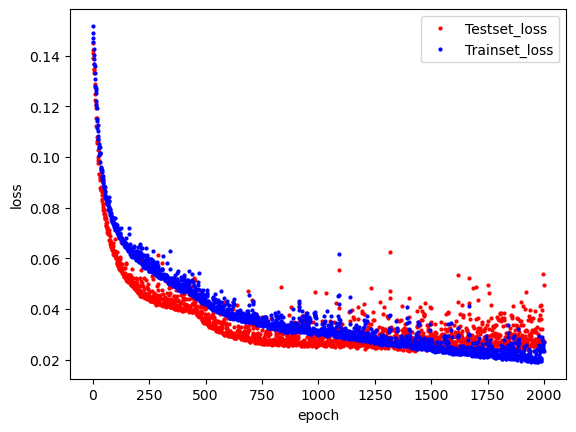

In [227]:
y_vloss=hist_df['val_loss']
y_loss=hist_df['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
# Overfitting이 되면 validation에 대한 loss가 오름
# validation loss 가 오르는 시점에서 훈련 종료시켜주자.
# patience 오르는 구간 참는다는 의미

* 학습 자동 중단
>  Overfitting이 되면 validation에 대한 loss가 오름
>>  validation loss 가 오르는 시점에서 훈련 종료시켜주자.
>>>  patience 오르는 구간 참는다는 의미

In [228]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import pandas as pd


df = pd.read_csv('data/wine.csv', header=None)

X = df.iloc[:,0:12]
y = df.iloc[:,12]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 30)                390       
                                                                 
 dense_41 (Dense)            (None, 12)                372       
                                                                 
 dense_42 (Dense)            (None, 8)                 104       
                                                                 
 dense_43 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [229]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)
# 학습 자동 중단 설정

modelpath="./data/model/Ch14-4-bestmodel.hdf5"

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
                               verbose=0, save_best_only=True) # save_best_only 최적만 저장 |중요|

history=model.fit(X_train, y_train, epochs=2000, batch_size=500,
                  validation_split=0.25, verbose=1, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/2000
8/8 [==============================] - 1s 23ms/step - loss: 32.9393 - accuracy: 0.2512 - val_loss: 29.4670 - val_accuracy: 0.2392
Epoch 2/2000
8/8 [==============================] - 0s 8ms/step - loss: 25.6989 - accuracy: 0.2512 - val_loss: 22.5002 - val_accuracy: 0.2392
Epoch 3/2000
8/8 [==============================] - 0s 8ms/step - loss: 19.1718 - accuracy: 0.2512 - val_loss: 15.5472 - val_accuracy: 0.2392
Epoch 4/2000
8/8 [==============================] - 0s 7ms/step - loss: 11.6118 - accuracy: 0.2512 - val_loss: 7.3540 - val_accuracy: 0.2392
Epoch 5/2000
8/8 [==============================] - 0s 7ms/step - loss: 4.5568 - accuracy: 0.2515 - val_loss: 1.4465 - val_accuracy: 0.2892
Epoch 6/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.5936 - accuracy: 0.7218 - val_loss: 0.2801 - val_accuracy: 0.9000
Epoch 7/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.3739 - accuracy: 0.8897 - val_loss: 0.3177 - val_accuracy: 0.9131
Epoch 8/2000

8/8 [==============================] - 0s 5ms/step - loss: 0.1491 - accuracy: 0.9448 - val_loss: 0.1382 - val_accuracy: 0.9546
Epoch 60/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.1479 - accuracy: 0.9451 - val_loss: 0.1361 - val_accuracy: 0.9554
Epoch 61/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.1468 - accuracy: 0.9453 - val_loss: 0.1357 - val_accuracy: 0.9554
Epoch 62/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.1471 - accuracy: 0.9453 - val_loss: 0.1317 - val_accuracy: 0.9577
Epoch 63/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.1461 - accuracy: 0.9433 - val_loss: 0.1377 - val_accuracy: 0.9538
Epoch 64/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.1440 - accuracy: 0.9466 - val_loss: 0.1312 - val_accuracy: 0.9562
Epoch 65/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.1424 - accuracy: 0.9469 - val_loss: 0.1329 - val_accuracy: 0.9562
Epoch 66/2000
8/8 [=======

8/8 [==============================] - 0s 4ms/step - loss: 0.1078 - accuracy: 0.9582 - val_loss: 0.1071 - val_accuracy: 0.9662
Epoch 118/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.1095 - accuracy: 0.9592 - val_loss: 0.1045 - val_accuracy: 0.9646
Epoch 119/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.1095 - accuracy: 0.9602 - val_loss: 0.1056 - val_accuracy: 0.9662
Epoch 120/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.1084 - accuracy: 0.9566 - val_loss: 0.1087 - val_accuracy: 0.9662
Epoch 121/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.1062 - accuracy: 0.9623 - val_loss: 0.1027 - val_accuracy: 0.9685
Epoch 122/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.1060 - accuracy: 0.9607 - val_loss: 0.1069 - val_accuracy: 0.9677
Epoch 123/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.1054 - accuracy: 0.9618 - val_loss: 0.1038 - val_accuracy: 0.9662
Epoch 124/2000
8/8 [=

Epoch 175/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0798 - accuracy: 0.9743 - val_loss: 0.0886 - val_accuracy: 0.9769
Epoch 176/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0808 - accuracy: 0.9754 - val_loss: 0.0883 - val_accuracy: 0.9792
Epoch 177/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0791 - accuracy: 0.9756 - val_loss: 0.0885 - val_accuracy: 0.9785
Epoch 178/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0788 - accuracy: 0.9761 - val_loss: 0.0864 - val_accuracy: 0.9785
Epoch 179/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0782 - accuracy: 0.9766 - val_loss: 0.0876 - val_accuracy: 0.9792
Epoch 180/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0783 - accuracy: 0.9746 - val_loss: 0.0876 - val_accuracy: 0.9792
Epoch 181/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0778 - accuracy: 0.9761 - val_loss: 0.0864 - val_accuracy: 0.9808
Epoch 

Epoch 233/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0644 - accuracy: 0.9797 - val_loss: 0.0812 - val_accuracy: 0.9815
Epoch 234/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0646 - accuracy: 0.9823 - val_loss: 0.0815 - val_accuracy: 0.9792
Epoch 235/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0630 - accuracy: 0.9805 - val_loss: 0.0802 - val_accuracy: 0.9838
Epoch 236/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0627 - accuracy: 0.9810 - val_loss: 0.0807 - val_accuracy: 0.9800
Epoch 237/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0635 - accuracy: 0.9808 - val_loss: 0.0816 - val_accuracy: 0.9792
Epoch 238/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0623 - accuracy: 0.9818 - val_loss: 0.0800 - val_accuracy: 0.9838
Epoch 239/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0623 - accuracy: 0.9815 - val_loss: 0.0804 - val_accuracy: 0.9800
Epoch 

Epoch 291/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0556 - accuracy: 0.9836 - val_loss: 0.0776 - val_accuracy: 0.9815
Epoch 292/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0548 - accuracy: 0.9846 - val_loss: 0.0792 - val_accuracy: 0.9846
Epoch 293/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0544 - accuracy: 0.9836 - val_loss: 0.0777 - val_accuracy: 0.9815
Epoch 294/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0543 - accuracy: 0.9851 - val_loss: 0.0779 - val_accuracy: 0.9815
Epoch 295/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0538 - accuracy: 0.9854 - val_loss: 0.0783 - val_accuracy: 0.9815
Epoch 296/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0552 - accuracy: 0.9838 - val_loss: 0.0781 - val_accuracy: 0.9815
Epoch 297/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0540 - accuracy: 0.9849 - val_loss: 0.0814 - val_accuracy: 0.9823
Epoch 

In [230]:
model.evaluate(X_test,y_test)

41/41 [==============================] - 0s 1ms/step - loss: 0.0458 - accuracy: 0.9877


[0.04579821601510048, 0.9876922965049744]